# Node Tuning

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np   
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import kerastuner as kt # for tuning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Flatten

In [36]:
df = pd.read_csv('diabetes.csv')
X = df.drop(columns=['Outcome'])
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.25, random_state=42)
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[ 0.6839137 , -0.70579433, -0.625833  , ...,  0.26501306,
        -0.11390738,  0.87654579],
       [-0.52726014, -0.26972894,  0.29889263, ...,  0.48823955,
        -0.94569142, -1.03690611],
       [-0.52726014, -0.39431905, -0.29945925, ..., -0.15517797,
        -0.91619553, -1.03690611],
       ...,
       [ 0.6839137 ,  0.07289387,  0.13570575, ...,  0.21248918,
         0.77981801,  0.09377001],
       [-0.22446668, -1.32874488, -1.06099801, ..., -0.12891603,
        -0.65073254, -0.60203068],
       [-0.22446668, -0.45661411,  0.13570575, ..., -0.81172646,
        -0.77166568, -0.51505559]])

In [37]:
def build_model(hp):
    model = Sequential()

    units = hp.Int('numberOfNodes',
                   min_value = 8, # initial value
                   max_value = 128, # last value
                   )
    initializer = tf.keras.initializers.he_normal
    model.add(
        Dense(units=units,activation = 'relu',input_dim = 8,kernel_initializer = initializer))
    model.add(
        Dense(1,activation = 'sigmoid'))

    model.compile(optimizer = 'adam',loss='binary_crossentropy',metrics = ['accuracy'])

    return model


In [38]:
tuner = kt.RandomSearch(hypermodel=build_model,
                        objective='val_accuracy',
                        max_trials=5,
                        directory='tuner',
                        project_name = 'notetuning'
                        )

In [39]:
tuner.search(X_train,y_train,epochs = 5,validation_data = (X_test,y_test))

Trial 5 Complete [00h 00m 02s]
val_accuracy: 0.640625

Best val_accuracy So Far: 0.6666666865348816
Total elapsed time: 00h 00m 09s
INFO:tensorflow:Oracle triggered exit


In [40]:
# for best parameters
tuner.get_best_hyperparameters()[0].values

{'numberOfNodes': 100}

In [41]:
# to directly extract model from hyperparameter tuning...........
model = tuner.get_best_models(num_models=1)[0]
model

In [42]:
# Training model
history = model.fit(X_train,y_train,batch_size=32,epochs=100,initial_epoch=6,validation_data=(X_test,y_test))

Epoch 7/100
18/18 [==============================] - 1s 13ms/step - loss: 1.8454 - accuracy: 0.6615 - val_loss: 1.9316 - val_accuracy: 0.6719
Epoch 8/100
18/18 [==============================] - 0s 5ms/step - loss: 1.7039 - accuracy: 0.6510 - val_loss: 1.9196 - val_accuracy: 0.6146
Epoch 9/100
18/18 [==============================] - 0s 4ms/step - loss: 1.6471 - accuracy: 0.6406 - val_loss: 1.6332 - val_accuracy: 0.6719
Epoch 10/100
18/18 [==============================] - 0s 4ms/step - loss: 1.4413 - accuracy: 0.6719 - val_loss: 1.5621 - val_accuracy: 0.6771
Epoch 11/100
18/18 [==============================] - 0s 3ms/step - loss: 1.3212 - accuracy: 0.6719 - val_loss: 1.4618 - val_accuracy: 0.6198
Epoch 12/100
18/18 [==============================] - 0s 4ms/step - loss: 1.2287 - accuracy: 0.6684 - val_loss: 1.3946 - val_accuracy: 0.6875
Epoch 13/100
18/18 [==============================] - 0s 5ms/step - loss: 1.2298 - accuracy: 0.6701 - val_loss: 1.4225 - val_accuracy: 0.7031
Epoch 14

In [43]:
model.get_weights()

[array([[-2.54640996e-01, -2.37151105e-02,  4.44344699e-01,
         -8.34288299e-01,  9.54202950e-01, -1.19294800e-01,
          1.29901096e-02, -3.94358128e-01,  3.79916042e-01,
          7.21053183e-02, -1.62598968e-01, -3.71276706e-01,
          7.11477578e-01,  1.32789940e-01, -1.83621138e-01,
         -2.67381608e-01,  3.81719798e-01,  1.21955143e-03,
         -3.06483805e-01,  1.41611919e-01,  6.24406815e-01,
          2.50755072e-01,  5.16028225e-01,  4.53765094e-01,
         -3.03180248e-01,  6.67803228e-01, -6.25222862e-01,
          1.14433907e-01,  7.30960429e-01,  6.81421995e-01,
          9.36103053e-03, -5.18113822e-02,  6.10180020e-01,
          8.93926620e-01, -2.60719657e-01, -4.09524173e-01,
          3.66267294e-01, -4.77381408e-01, -4.26907599e-01,
         -7.12572098e-01,  5.19674003e-01, -4.77376860e-03,
         -4.50778902e-01,  7.83891737e-01,  3.46596807e-01,
         -3.10410172e-01, -1.45064428e-01, -8.30541432e-01,
         -1.62232313e-02, -3.01418513e-0

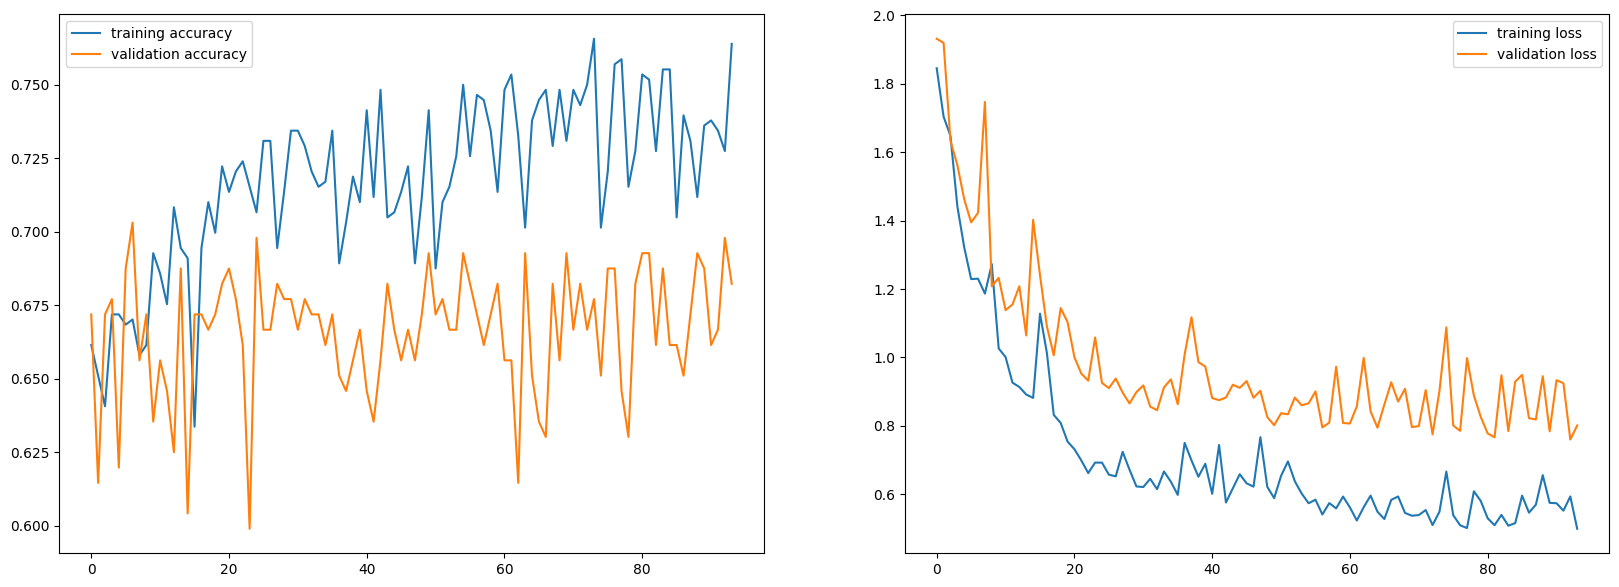

In [44]:
plt.subplots(nrows=1,ncols=2,figsize = (20,7))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training accuracy','validation accuracy'])
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training loss','validation loss'])
